Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 44.53 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Setting up PyTorch plugin "bias_act_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_

Failed!


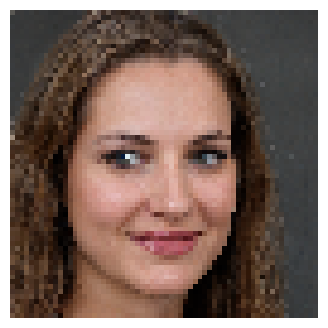

Image saved to 'generated_images/fake.png'


In [ ]:
# -------------------------------------------------------
# StyleGAN2-ADA: Generate a single image (clean, fast)
# -------------------------------------------------------

import os
import sys
import torch
import urllib.request
import matplotlib.pyplot as plt
from torchvision.utils import save_image, make_grid

# ------------------- Suppress warnings -------------------
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ------------------- Clone repo if not exists -----------
if not os.path.exists('stylegan2-ada-pytorch'):
    !git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

sys.path.append('stylegan2-ada-pytorch')

# ------------------- Download pretrained model ----------
MODEL_PATH = 'ffhq.pkl'
if not os.path.exists(MODEL_PATH):
    urllib.request.urlretrieve(
        'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl',
        MODEL_PATH
    )

# ------------------- Import StyleGAN utilities ----------
import importlib.util

# Legacy loader (works with latest repo)
spec = importlib.util.spec_from_file_location(
    "legacy", "stylegan2-ada-pytorch/legacy.py"
)
legacy = importlib.util.module_from_spec(spec)
spec.loader.exec_module(legacy)

# ------------------- Device setup -----------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ------------------- Load pretrained generator ----------
with open(MODEL_PATH, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)

# ------------------- Generate a random image ------------
z = torch.randn([1, G.z_dim], device=device)
label = torch.zeros([1, G.c_dim], device=device)
img = (G(z, label, truncation_psi=0.5, noise_mode='const') + 1) / 2  # [0,1] range

# ------------------- Downsize & save --------------------
os.makedirs('generated_images', exist_ok=True)
img_small = torch.nn.functional.interpolate(img, size=64)  # small for speed
save_image(img_small, 'generated_images/fake.png')

# ------------------- Display ---------------------------
plt.figure(figsize=(4, 4))
plt.imshow(make_grid(img_small, nrow=1).permute(1, 2, 0).cpu())
plt.axis('off')
plt.show()

print("Image saved to 'generated_images/fake.png'")
